# Data Visualization

In [83]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats

In [56]:
df = pd.read_pickle('Data/clean_data')
df['matchingCVV'] = df['cardCVV'] == df['enteredCVV']
df['matchingCountry'] = df['acqCountry'] == df['merchantCountryCode']

## Process binary feature columns into 0,1
for col in ['cardPresent', 'matchingCVV','matchingCountry', 'expirationDateKeyInMatch', 'isFraud']:
    df[col] = df[col].replace({False: 0, True: 1})

In [57]:
plt.figure(figsize=(18,8))
sns.set() #set sns style

<Figure size 1296x576 with 0 Axes>

## Plot of transactionAmount

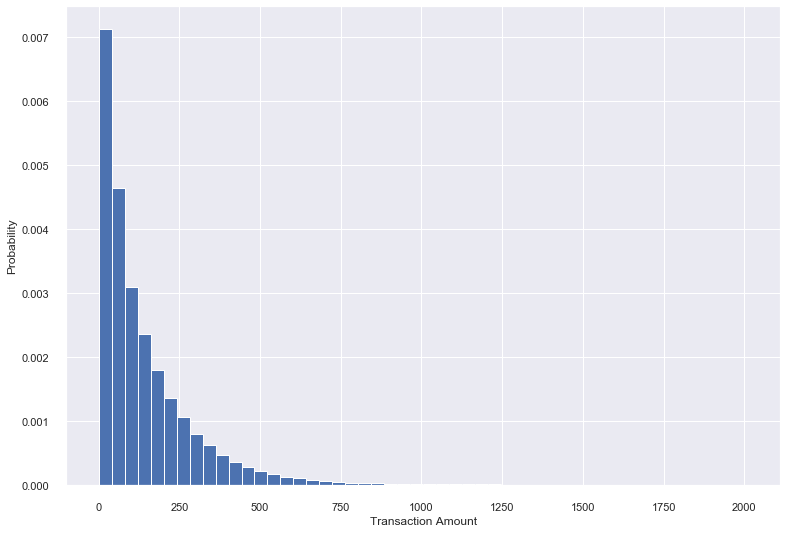

In [58]:
plt.hist(df['transactionAmount'], density=True, bins=50)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Transaction Amount');

- Highly right skewed

- A large amount of transactions is typically small, which indicates most of daily uses


## Pair plot of four money-related features

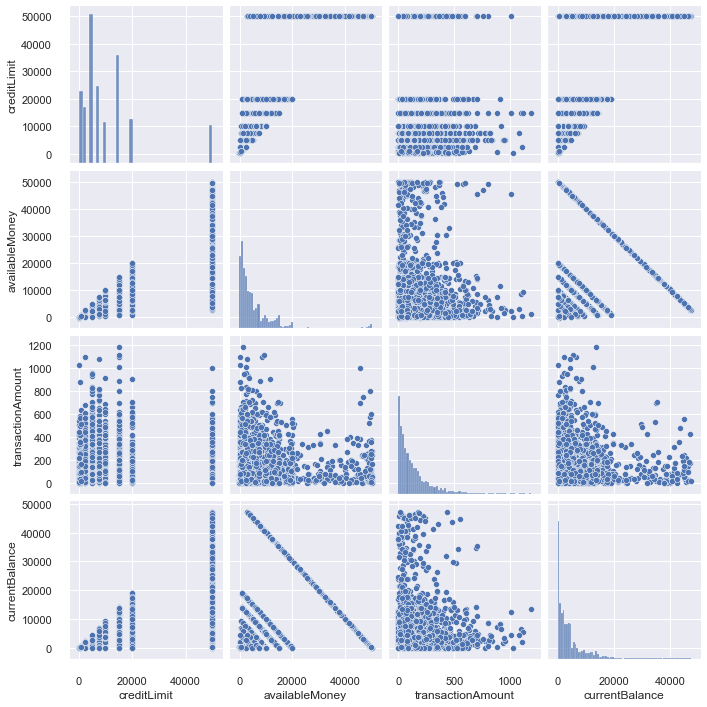

In [81]:
df_show = df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].sample(n=4000, random_state=1)
sns.pairplot(df_show) 

## Box plot of four money-related features

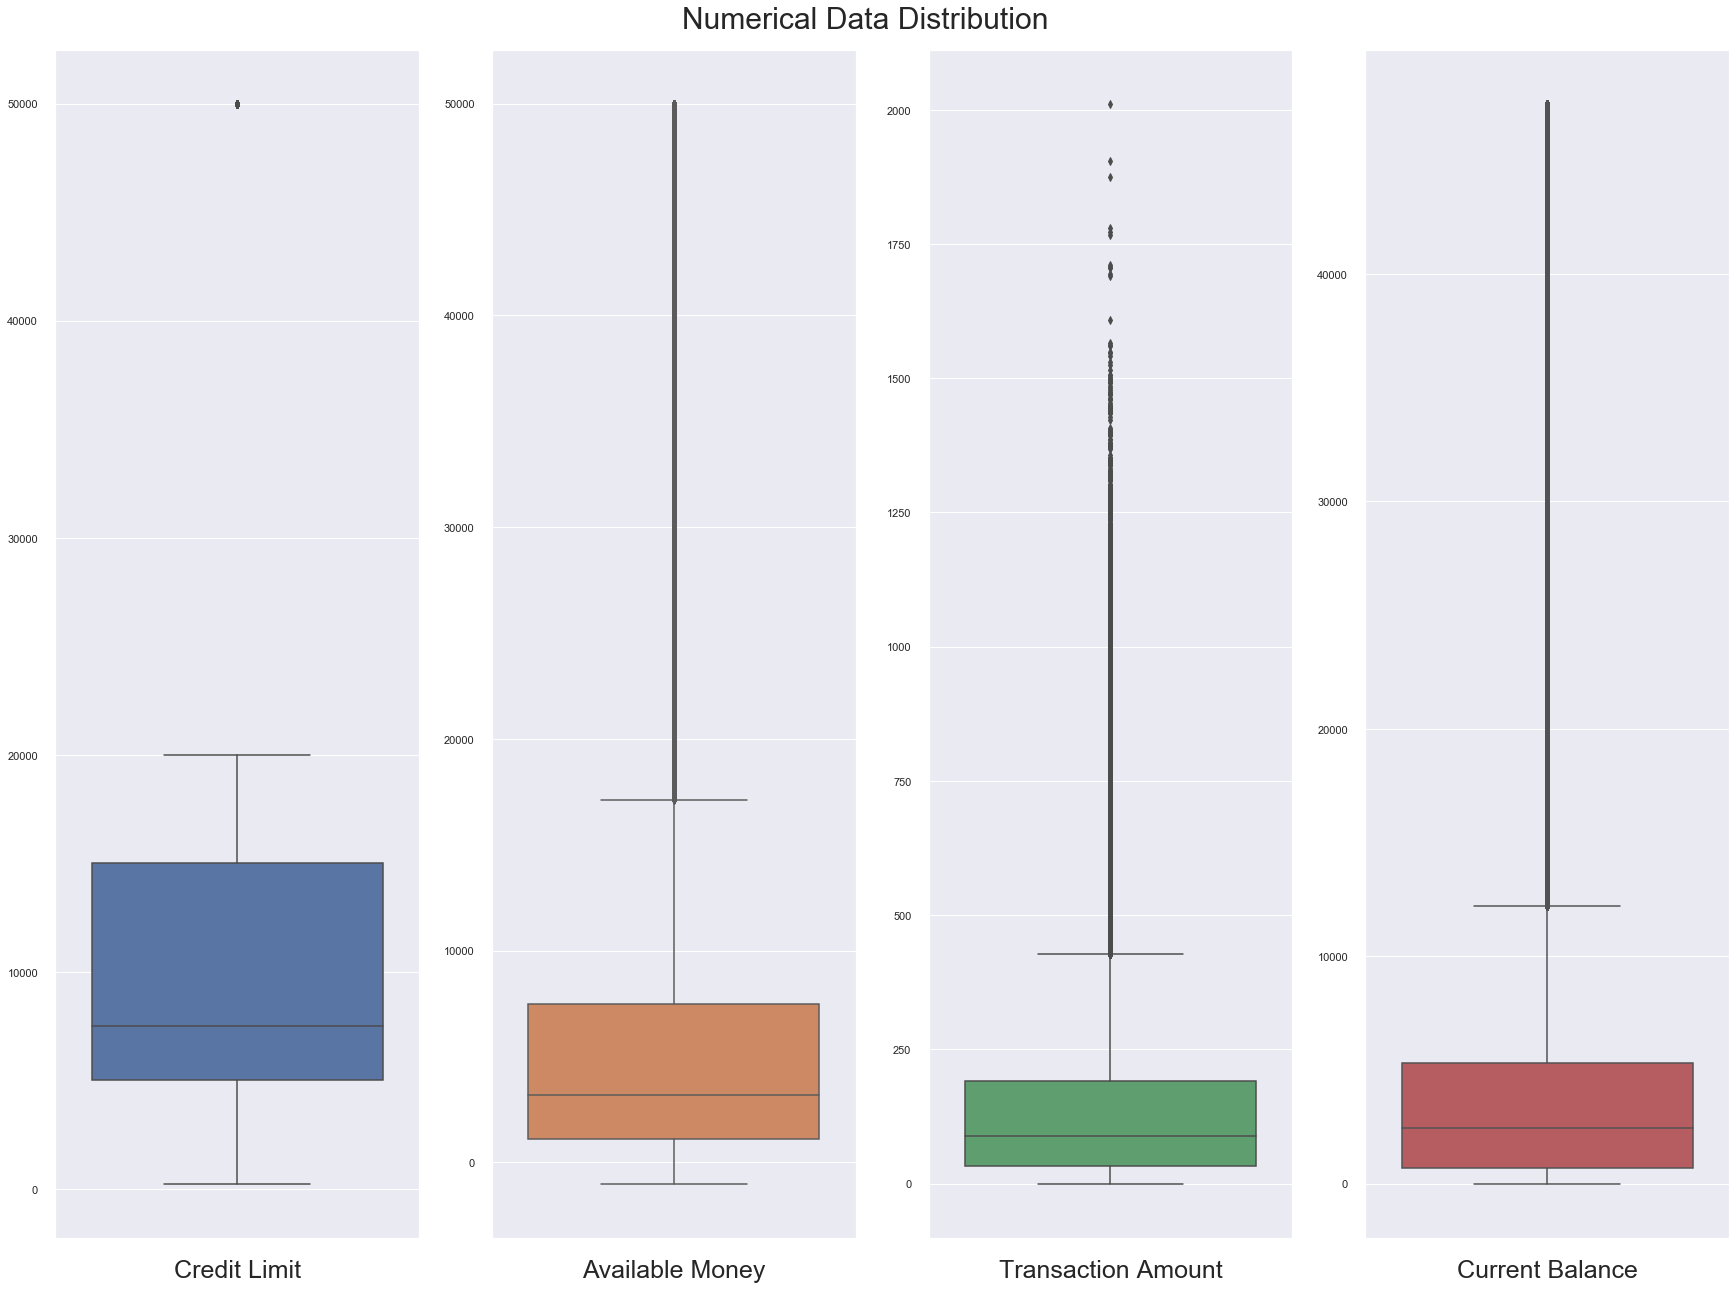

In [84]:
## Reference https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146

palette = sns.color_palette(None, 4)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = palette

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, y=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')
plt.suptitle('Numerical Data Distribution', fontsize=30)
fig.subplots_adjust(top=0.95)

All four features are right skewed

### creditLimit
- Pretty sparse and some extreme values goes to 50,000

- The peak is at 5000 usd

### availableMoney

- Most available money are pretty low.

- Also few outliers at the far right

### transactionAmount

- Even more right skewed

- Has a wierd distribution with availableMoney. transactionAmount is high on two sides, but not significant when availableMoney is at the middle.

### currentBalance
- Observe a negative correlation with transactionAmount

## Correlatoin HeatMap

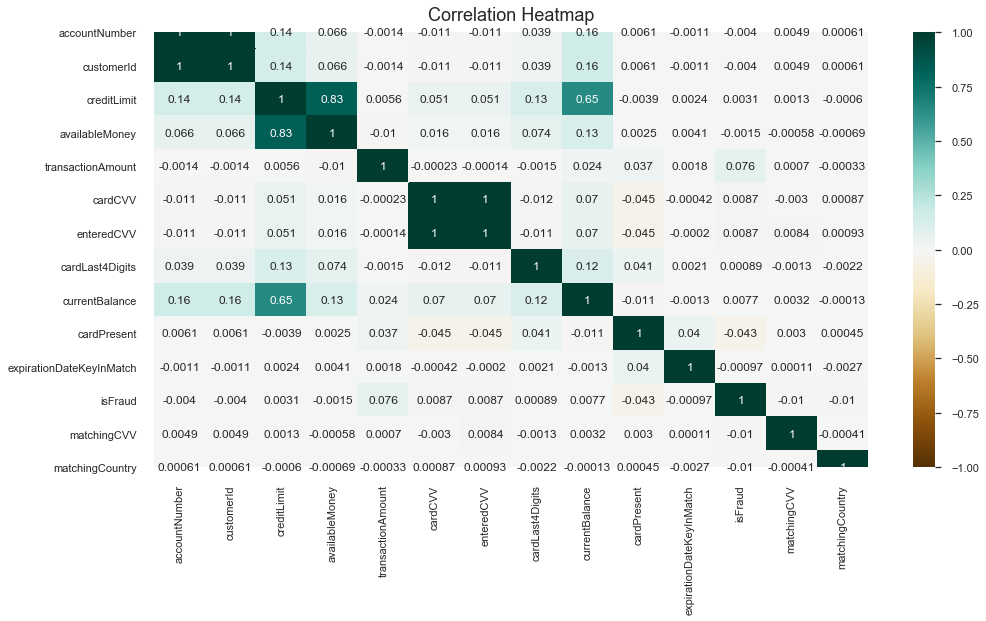

In [87]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

- We can observe some very strong correlations such as creditLimit & availableMoney.
- There are some non-trivial correlations, such as currentBalance and cardPresent

## isFraud

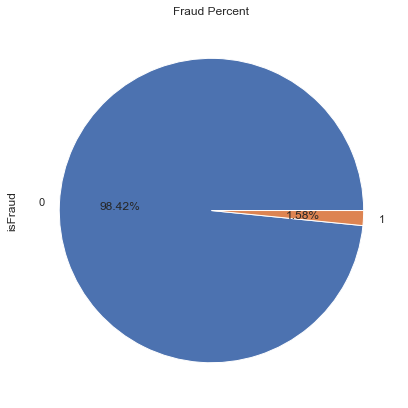

In [61]:
plt.figure(figsize=[9,7])
df['isFraud'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Fraud Percent')
plt.show()

Highly unbalanced. Only 1.58% fraud data

## Violin Plot of posEntryMode & transactionAmount & isFraud

Text(0.5, 1.0, 'posEntryMode & transactionAmount & isFraud')

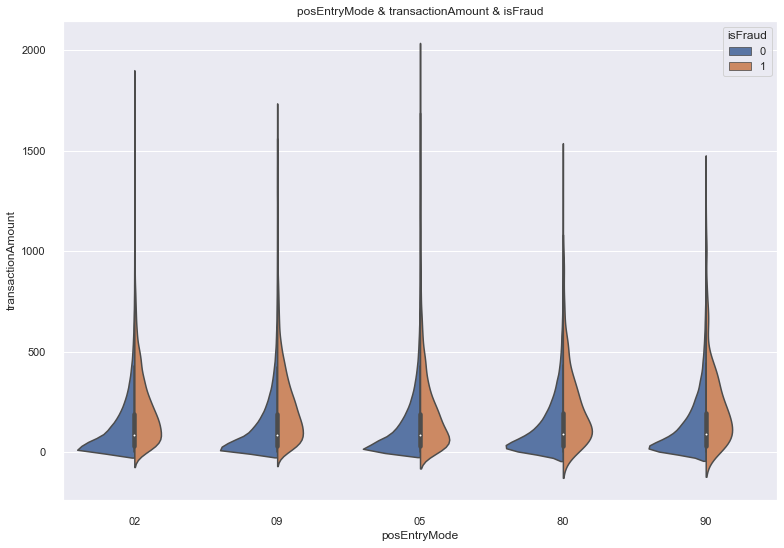

In [86]:
sns.violinplot(data=df, y='transactionAmount', x='posEntryMode', hue='isFraud', split=True)
plt.xlabel('posEntryMode')
plt.ylabel('transactionAmount')
plt.title('posEntryMode & transactionAmount & isFraud')

- In general, the distribution of transactionAmount when fraud is less right skewed. It is reasonable since most fraud wouldn't waste time on small transactions.
- Different posEntryMode has similar distributions when no fraud , but has different distributions when fraud. The 90 is most flat, while 05 is more skewed.

## Violin Plot of matchingCVV & transactionAmount & isFraud

Text(0.5, 1.0, 'matchingCVV & transactionAmount')

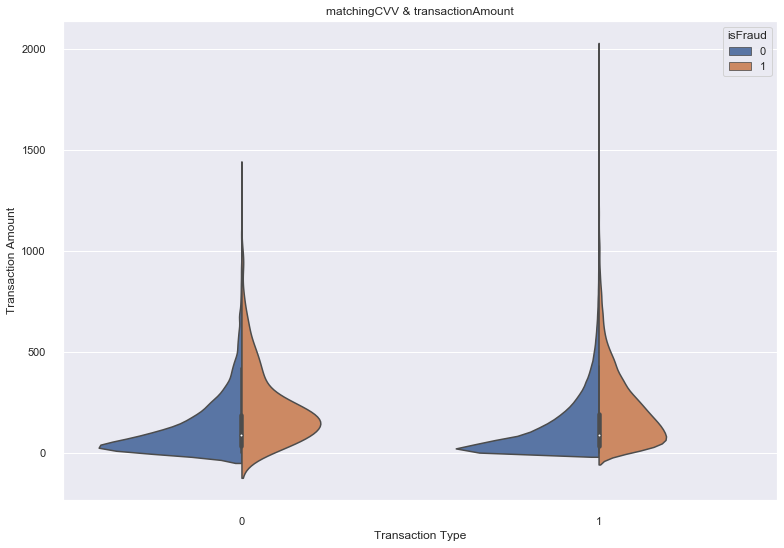

In [90]:
sns.violinplot(data=df, y='transactionAmount', x='matchingCVV', hue='isFraud', split=True)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('matchingCVV & transactionAmount')

- Similarly, the distribution of transactionAmount when fraud is less right skewed.
- When threre is a wrong CVV entry, the transactionAmount for fraud transactions is higher in general.

## Top merchants

In [70]:
def show_merchant_name(df):
    agg_merchant = df.groupby(("merchantName"), as_index=False).agg({"accountNumber" : "count", "isFraud" : "sum"})
    agg_merchant.rename(columns={'accountNumber':'merchantHot', 'isFraud':'merchantFraud'}, inplace=True)
    agg_merchant=agg_merchant.sort_values(by=['merchantHot','merchantFraud'], ascending = False).reset_index(drop=True)
    x = agg_merchant.merchantHot.values.tolist()[:20]
    sns.barplot(y=list(range(len(x))), x=x, orient='h').set_title('Top 20 Merchants')
    yticks = plt.yticks(ticks=list(range(len(x))), labels=agg_merchant.merchantName.values.tolist()[:20])

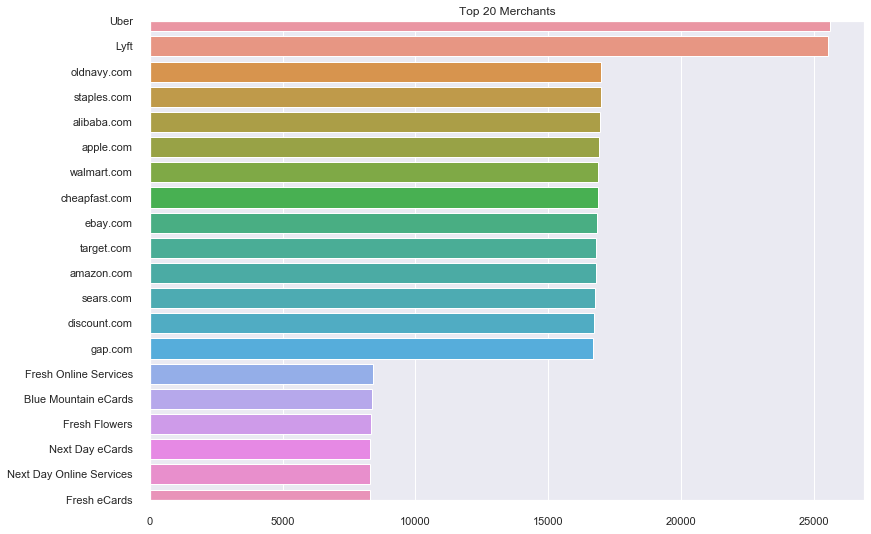

In [71]:
show_merchant_name(df)

Top merchants are clearly from different industries but most of them are offering online services. In particular, those websites with .com take a large proportion.

## Top merchant categories

In [92]:
def show_merchant_cat(df):
    agg_merchant = df.groupby(("merchantCategoryCode"), as_index=False).agg({"accountNumber" : "count", "isFraud" : "sum"})
    agg_merchant.rename(columns={'accountNumber':'merchantHot', 'isFraud':'merchantFraud'}, inplace=True)
    agg_merchant=agg_merchant.sort_values(by=['merchantHot','merchantFraud'], ascending = False).reset_index(drop=True)
    x = agg_merchant.merchantHot.values.tolist()
    sns.barplot(y=list(range(len(x))), x=x, orient='h').set_title('Top Merchant Category')
    yticks = plt.yticks(ticks=list(range(len(x))), labels=agg_merchant.merchantCategoryCode.values.tolist()[:20])

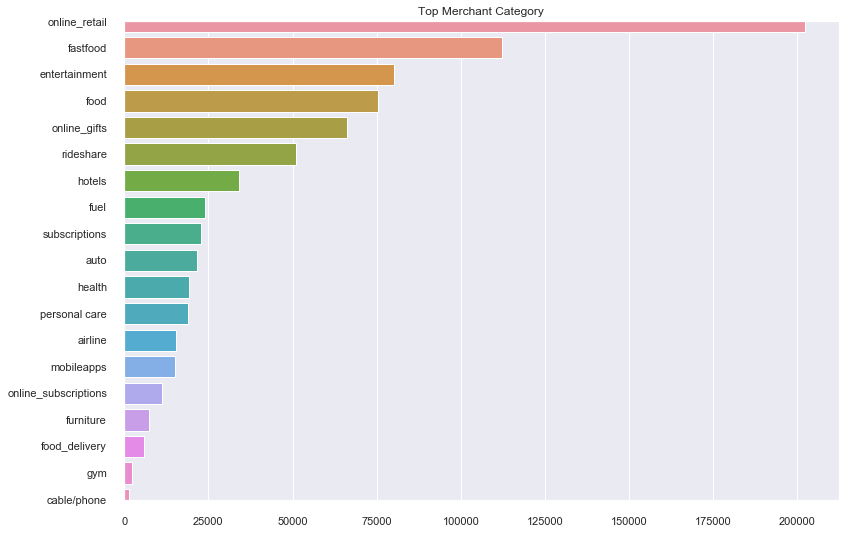

In [93]:
show_merchant_cat(df)

Most transcations are with merchants from few head categories.

## More Visualizations

I put few important visualizations in part 3. I believe those pics will better illustrate my processing choice.